In [12]:
import os
import glob 
import numpy as np

# Work on output of wrf
from wrf import getvar, ALL_TIMES, interplevel, get_cartopy, to_np

# Calculate fields
import metpy.calc as mpcalc
from metpy.units import units

# Import file netCDF4
from netCDF4 import Dataset

# Make plots
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import cm
from downcast import reduce
import pandas as pd
# Work with projections
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf

In [13]:
df = pd.read_csv('/media/lucasdmarten/HD/backup/projetos/tcc/tcc/data/altimetria/30_57_cor_rec.txt',
                  names=['lon','lat','alt'], delimiter='\s+').drop_duplicates()
df = reduce(df)

In [16]:
coords = (-55.736647725973654, -55.68136510684949, -30.85747533191794, -30.790008823154768)
coords[0]

-55.736647725973654

In [17]:
df = df[ (df.lon>=coords[0]) & (df.lon<=coords[1]) & (df.lat>=coords[2]) & (df.lat<=coords[3]) ]

In [18]:
df

,lon,lat,alt
1818732,-55.7500,-30.796875,284.0
1818733,-55.7500,-30.796875,285.0
1818734,-55.7500,-30.796875,285.0
1818735,-55.7500,-30.796875,286.0
1818736,-55.7500,-30.796875,287.0
...,...,...,...
1991819,-55.6875,-30.859375,342.0
1991820,-55.6875,-30.859375,342.0
1991821,-55.6875,-30.859375,344.0
1991822,-55.6875,-30.859375,344.0


In [19]:
lon=df.lon
lat=df.lat
alt=df.alt
lon.shape,lat.shape,alt.shape

((10528,), (10528,), (10528,))

In [27]:
lat

1822487   -30.7908
1822488   -30.7908
1822489   -30.7908
1822490   -30.7908
1822491   -30.7908
            ...   
1841122   -30.7991
1841123   -30.7991
1841124   -30.7991
1841125   -30.7991
1841126   -30.7991
Name: lat, Length: 700, dtype: float64

In [26]:
df

,lon,lat,alt
1822487,-55.7358,-30.7908,296.0
1822488,-55.7350,-30.7908,294.0
1822489,-55.7342,-30.7908,293.0
1822490,-55.7333,-30.7908,295.0
1822491,-55.7325,-30.7908,296.0
...,...,...,...
1841122,-55.7067,-30.7991,311.0
1841123,-55.7058,-30.7991,308.0
1841124,-55.7050,-30.7991,310.0
1841125,-55.7042,-30.7991,311.0


In [28]:
lon

1822487   -55.7358
1822488   -55.7350
1822489   -55.7342
1822490   -55.7333
1822491   -55.7325
            ...   
1841122   -55.7067
1841123   -55.7058
1841124   -55.7050
1841125   -55.7042
1841126   -55.7033
Name: lon, Length: 700, dtype: float64

In [20]:
x,y,z = np.meshgrid(lon,lat,alt)

MemoryError: Unable to allocate 2.12 TiB for an array with shape (10528, 10528, 10528) and data type float16

In [29]:
z[:,:,:]

array([[[296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        ...,
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.]],

       [[296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        ...,
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.]],

       [[296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        ...,
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.],
        [296., 294., 293., ..., 310., 311., 312.]],

       ...,

       [[296., 294., 293

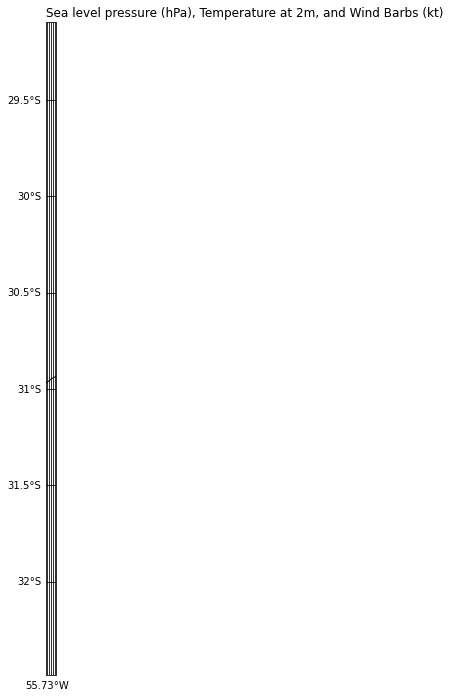

In [17]:
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))

# Plot 500-hPa Colorfill Wind Speeds in knots
# clevs_ctt = np.arange(z[0,:,:].min(),\
#                            z[0,:,:].max())
cfs = ax.contourf(x[0,:,:],y[0,:,:],z[0,:,:], cmap=get_cmap('jet'), 
                 transform=ccrs.PlateCarree())


plt.title('Sea level pressure (hPa), Temperature at 2m,'
          ' and Wind Barbs (kt)', loc='left')
# plt.title('Valid Time: {}'.format(str(t.values)[:-7]), loc='right')

# Adjust image and show
# plt.subplots_adjust(bottom=0, top=1)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
plt.show()
# plt.savefig('./slp_t2_dir.pdf')
# plt.savefig('./slp_t2_dir.png')

#### Upload ouput file wrf:

In [ ]:
#files = glob.glob('/home/lucas/exp/exp_01/run/wrfout_d01*')
#wrffiles = [Dataset(x) for x in files]
wrffiles = Dataset('/media/lucasdmarten/HD/wrf/WRF/run/geo_em.d01.nc')

#### Get geo wrf:

In [ ]:
# latitude/longitude
lat = getvar(wrffiles, 'lat')
lon = getvar(wrffiles, 'lon')
hgt = getvar(wrffiles, 'HGT_M')

#### Get projection 

In [ ]:
cart_proj=get_cartopy(slp)

In [ ]:
# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()
platecrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=platecrs)

# Add geopolitical boundaries for map reference
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))

# Plot 500-hPa Colorfill Wind Speeds in knots
clevs_ctt = np.arange(hgt.min().values,\
                           hgt.max().values, 200)
cfs = ax.contourf(lon, lat, hgt, cmap=get_cmap('jet'), 
                 transform=datacrs)
plt.colorbar(cfs, orientation='horizontal', pad=0, aspect=40)


plt.title('Sea level pressure (hPa), Temperature at 2m,'
          ' and Wind Barbs (kt)', loc='left')
plt.title('Valid Time: {}'.format(str(t.values)[:-7]), loc='right')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
plt.savefig('./slp_t2_dir.pdf')
plt.savefig('./slp_t2_dir.png')

# 500-hPa Geopotential Heights (m), Wind Speed (m/s), and Wind Barbs (kt) 

In [ ]:
# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=cart_proj)

# Add geopolitical boundaries for map reference
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))

# Plot 500-hPa Colorfill Wind Speeds in knots
clevs_500_sped = np.arange(wspd_500.min().values+5,\
                           wspd_500.max().values+5, 5)
cfs = ax.contourf(lon, lat, wspd_500, clevs_500_sped, cmap=get_cmap('jet'),
                 transform=datacrs)
plt.colorbar(cfs, orientation='horizontal', pad=0, aspect=50)

# Plot 500-hPa Geopotential Heights in meters
clevs_500_hght = np.arange(h_500.min().values+1,\
                           h_500.max().values+1, 20)

cs = ax.contour(lon, lat, h_500, clevs_500_hght, colors='black',
                transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
ax.barbs(lon.values, lat.values, u_500.values, v_500.values, pivot='middle',
         color='black', regrid_shape=10, transform=datacrs)

# Make some nice titles for the plot (one right, one left)
plt.title('500-hPa Geopotential Heights (m), Wind Speed (m/s),'
          ' and Wind Barbs (kt)', loc='left')
plt.title('Valid Time: {}'.format(t), loc='right')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.savefig('./h_wspd_500.pdf')
plt.savefig('./h_wspd_500.png')

# Sea level pressure (hPa), Temperature at 2m, and Wind Barbs (kt)

In [ ]:
# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()
platecrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=platecrs)

# Add geopolitical boundaries for map reference
ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.STATES.with_scale('50m'))

# Plot 500-hPa Colorfill Wind Speeds in knots
clevs_t2m = np.arange(t2m.min().values-275.15,\
                           t2m.max().values-275.15, 1)
cfs = ax.contourf(lon, lat, t2m-275.15, clevs_t2m, cmap=get_cmap('jet'),
                 transform=datacrs)
plt.colorbar(cfs, orientation='horizontal', pad=0, aspect=40)

# Plot 500-hPa Geopotential Heights in meters
clevs_slp = np.arange(slp.min().values,\
                           slp.max().values, 1)

cs = ax.contour(lon, lat, slp, clevs_slp, colors='black',
                transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
ax.barbs(lon.values, lat.values, u_compont[0].values, v_compont[0].values, pivot='middle',
         color='black', regrid_shape=15, transform=datacrs)

# Make some nice titles for the plot (one right, one left)
plt.title('Sea level pressure (hPa), Temperature at 2m,'
          ' and Wind Barbs (kt)', loc='left')
plt.title('Valid Time: {}'.format(str(t)[:19]), loc='right')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
plt.savefig('./slp_t2m_dir2.pdf')
plt.savefig('./slp_t2m_dir2.png')

# Plotar temperatura de topo de nuvem e temperatura a 2m
### obs: colorbar muito grande 

In [ ]:
fig = plt.figure(figsize=(17,8),dpi=100)
gs = fig.add_gridspec(1, 2)

# 1° axe
ax1 = fig.add_subplot(gs[0, 0], projection=cart_proj)
ax1.coastlines('50m', linewidth=0.8)
ax1.contourf(to_np(lon), to_np(lat), to_np(t2m), 10, 
            transform=ccrs.PlateCarree(),cmap=get_cmap("jet"))
ax1.set_title('Cloud top temperature - °C')
# Add geopolitical boundaries for map reference
ax1.add_feature(cf.COASTLINE.with_scale('50m'))
ax1.add_feature(cf.STATES.with_scale('50m'))

# 2° axe
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Mercator())
ax2.coastlines('50m', linewidth=0.8)
ax2.contourf(to_np(lon), to_np(lat), to_np(t2m),\
            level=np.arange(0, 30,20),  cmap=get_cmap("jet"),
            transform=ccrs.PlateCarree())
ax2.set_title('Temperature at 2 meters - °C')
# Add geopolitical boundaries for map reference
ax2.add_feature(cf.COASTLINE.with_scale('50m'))
ax2.add_feature(cf.STATES.with_scale('50m'))
# draw gridlines for ax2
gl = ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),color='black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False


# colorbar for ax2
sm = plt.cm.ScalarMappable(cmap=get_cmap("jet"))
cb = plt.colorbar(sm)


plt.ticklabel_format()